<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-准备数据" data-toc-modified-id="1-准备数据-1">1 准备数据</a></span><ul class="toc-item"><li><span><a href="#1.1-加载数据" data-toc-modified-id="1.1-加载数据-1.1">1.1 加载数据</a></span></li><li><span><a href="#1.2-将日期列由数字解析为日期" data-toc-modified-id="1.2-将日期列由数字解析为日期-1.2">1.2 将日期列由数字解析为日期</a></span></li><li><span><a href="#1.3-获取label列" data-toc-modified-id="1.3-获取label列-1.3">1.3 获取label列</a></span><ul class="toc-item"><li><span><a href="#1.3.1-可视化购买和赎回曲线" data-toc-modified-id="1.3.1-可视化购买和赎回曲线-1.3.1">1.3.1 可视化购买和赎回曲线</a></span></li><li><span><a href="#1.3.2-仅查看14年4月到5月7日的购买和赎回曲线" data-toc-modified-id="1.3.2-仅查看14年4月到5月7日的购买和赎回曲线-1.3.2">1.3.2 仅查看14年4月到5月7日的购买和赎回曲线</a></span></li></ul></li><li><span><a href="#1.4-生成测试数据" data-toc-modified-id="1.4-生成测试数据-1.4">1.4 生成测试数据</a></span></li></ul></li><li><span><a href="#2-计算周1——周日每一天的均值" data-toc-modified-id="2-计算周1——周日每一天的均值-2">2 计算周1——周日每一天的均值</a></span></li><li><span><a href="#3-计算周期因子" data-toc-modified-id="3-计算周期因子-3">3 计算周期因子</a></span></li><li><span><a href="#4-计算日期因子" data-toc-modified-id="4-计算日期因子-4">4 计算日期因子</a></span></li><li><span><a href="#5-按日分组计算总购买和总赎回的均值" data-toc-modified-id="5-按日分组计算总购买和总赎回的均值-5">5 按日分组计算总购买和总赎回的均值</a></span></li><li><span><a href="#7-计算base" data-toc-modified-id="7-计算base-6">7 计算base</a></span></li><li><span><a href="#7-根据base和周期因子预测" data-toc-modified-id="7-根据base和周期因子预测-7">7 根据base和周期因子预测</a></span></li><li><span><a href="#8-保存预测结果" data-toc-modified-id="8-保存预测结果-8">8 保存预测结果</a></span></li><li><span><a href="#9-可视化预测结果" data-toc-modified-id="9-可视化预测结果-9">9 可视化预测结果</a></span></li><li><span><a href="#10-fbprophet、ARIMA、周期因子模型融合预测" data-toc-modified-id="10-fbprophet、ARIMA、周期因子模型融合预测-10">10 fbprophet、ARIMA、周期因子模型融合预测</a></span><ul class="toc-item"><li><span><a href="#10.1-读取单模型预测结果" data-toc-modified-id="10.1-读取单模型预测结果-10.1">10.1 读取单模型预测结果</a></span></li><li><span><a href="#10.2-根据单模型成绩估计融合权重" data-toc-modified-id="10.2-根据单模型成绩估计融合权重-10.2">10.2 根据单模型成绩估计融合权重</a></span></li></ul></li></ul></div>

Action: 资金流入流出预测    
https://tianchi.aliyun.com/competition/entrance/231573/information    
数据集一共包括4张表：用户基本信息数据、用户申购赎回数据、收益率表和银行间拆借利率表    
2.8万用户，284万行为数据，294天拆解利率，427天收益率    
2013-07-01到2014-08-31，预测2014年9月的申购和赎回

基于周期因子的时间序列预测。

In [1]:
import datetime

import numpy as np

from itertools import product

import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import warnings


warnings.filterwarnings("ignore")

In [2]:
import calendar


# 1 准备数据
## 1.1 加载数据

In [3]:
user_balance_df = pd.read_csv('user_balance_table.csv')

In [4]:
user_balance_df.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [5]:
# 除了4个category列，其他列无缺失值
user_balance_df.isna().sum()

user_id                      0
report_date                  0
tBalance                     0
yBalance                     0
total_purchase_amt           0
direct_purchase_amt          0
purchase_bal_amt             0
purchase_bank_amt            0
total_redeem_amt             0
consume_amt                  0
transfer_amt                 0
tftobal_amt                  0
tftocard_amt                 0
share_amt                    0
category1              2666682
category2              2666682
category3              2666682
category4              2666682
dtype: int64

In [6]:
# 昨日余额 + 今日总购买量 - 今日总赎回量
total = user_balance_df['yBalance'] + user_balance_df['total_purchase_amt'] - user_balance_df['total_redeem_amt']

In [7]:
user_balance_df[total != user_balance_df['tBalance']]

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
2234657,9872,20130813,1356954,860592,506227,506183,0,506183,9765,0,9765,9765,0,44,NaN,NaN,NaN,NaN


- 今日余额 = 昨日余额 + 今日申购 - 今日赎回    
(除了2234657行)：tBalance = yBalance + total_purchase_amt - total_consume_amt    

- 今日总购买量 = 直接购买 + 收益    
即：total_purchase_amt = direct_purchase_amt +  share_amt    

- 今日总赎回量 = 消费 + 转出
即：total_redeem_amt = consume_amt + transfer_amt

## 1.2 将日期列由数字解析为日期

In [8]:
def add_timestamp(df):
    df['report_date'] = pd.to_datetime(df['report_date'], format="%Y%m%d")
    df['day'] = df['report_date'].dt.day
    df['month'] = df['report_date'].dt.month
    df['year'] = df['report_date'].dt.year
    df['week'] = df['report_date'].dt.week # 第几个星期
    df['weekday'] = df['report_date'].dt.weekday
    return df
    

In [9]:
user_balance_df = add_timestamp(user_balance_df)

In [10]:
user_balance_df['report_date'].min(), user_balance_df['report_date'].max()

(Timestamp('2013-07-01 00:00:00'), Timestamp('2014-08-31 00:00:00'))

In [11]:
user_balance_df.head(2)

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4


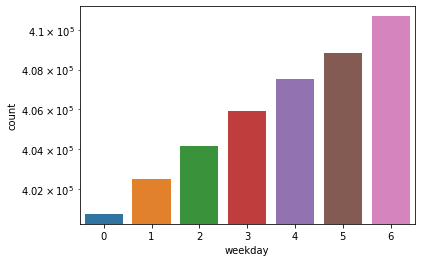

In [12]:
ax = sns.countplot(x='weekday', data=user_balance_df)
ax.set_yscale('log')

一周内每一天的样本数都在40W以上，其中周一样本数最少，周日样本数最多，二者相差样本数约1W条。

## 1.3 获取label列

In [13]:
def get_total_balance(df, begin):
    """筛选指定日期之后的总购买量和总赎回量的DataFrame
    """
    df_temp = df.copy()
    # 按日期进行聚合
    df_temp = df_temp.groupby("report_date")['total_purchase_amt',
                                             'total_redeem_amt'].sum()
    # 还原日期字段，重新索引
    df_temp = df_temp.reset_index()
    df_temp = df_temp[df_temp['report_date'] >= begin]
    return df_temp

In [14]:
# 筛选从'2014-03-01'之后的数据作为平稳数据
total_balance = get_total_balance(user_balance_df, '2014-03-01')

In [15]:
total_balance

,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580,211279011
244,2014-03-02,276202230,246199417
245,2014-03-03,505305862,513017360
246,2014-03-04,524146340,250562978
247,2014-03-05,454295491,209072753
...,...,...,...
422,2014-08-27,302194801,468164147
423,2014-08-28,245082751,297893861
424,2014-08-29,267554713,273756380
425,2014-08-30,199708772,196374134


### 1.3.1 可视化购买和赎回曲线

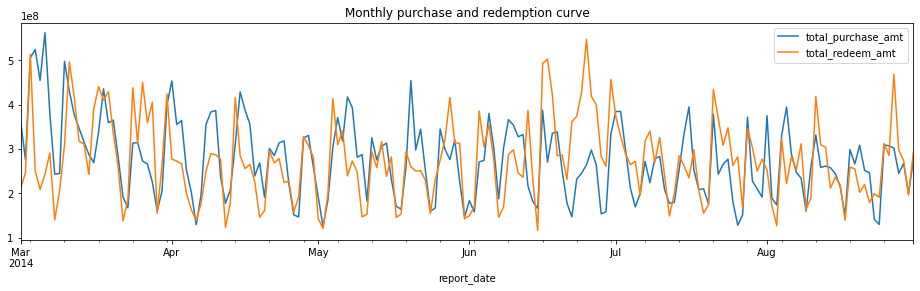

In [16]:
total_balance.set_index('report_date').plot(
    figsize=(16, 4), title="2014.03 - 2014.08 purchase and redemption curve ")

四月之后看起来没什么趋势是平稳序列。

### 1.3.2 仅查看14年4月到5月7日的购买和赎回曲线

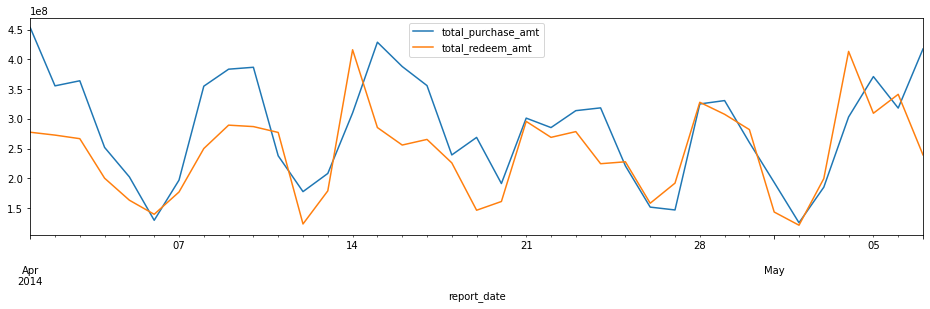

In [17]:
total_balance.set_index('report_date').loc['2014-04-01':'2014-05-07'].plot(
    figsize=(16, 4))

In [54]:
print(calendar.month(2014, 4))

     April 2014
Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30



可以看出每周末数据会处于低谷，且在周二、周三数据较高。判断每周是一个周期。数据抖动幅度较大。

## 1.4 生成测试数据

In [18]:
# def generate_test_data(df):
#     """生成9月1日到30日的测试集"""
#     df_temp = df.copy()
#     start = datetime.datetime(2014, 9, 1)
#     end = datetime.datetime(2014, 10, 1)
#     testdata = []
#     while start != end:
#         # 添加3个字段
#         temp = [start, np.nan, np.nan]
#         testdata.append(temp)
#         start += datetime.timedelta(days=1)

#     testdata = pd.DataFrame(testdata, columns=df_temp.columns)
#     df_temp = df_temp.append(testdata)

#     return df_temp


def generate_test_data(df):
    """生成包含9月1日到30日测试集的数据集"""
    df_temp = df.copy()
    test = pd.DataFrame(np.full((30, 3), fill_value=np.nan, dtype=float), columns=df_temp.columns)
    test['report_date'] = pd.date_range('2014-09-01',
                                        '2014-09-30',
                                        freq='D',
                                        closed=None) # 左右均闭

    return df_temp.append(test)


total_balance = generate_test_data(total_balance)
total_balance.tail(2)


,report_date,total_purchase_amt,total_redeem_amt
28,2014-09-29,NaN,NaN
29,2014-09-30,NaN,NaN


In [19]:
# temp = total_balance.copy()

In [20]:
# total_balance = temp.copy()
total_balance = add_timestamp(total_balance)
total_balance.tail(2)

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
28,2014-09-29,NaN,NaN,29,9,2014,40,0
29,2014-09-30,NaN,NaN,30,9,2014,40,1


# 2 计算周1——周日每一天的均值
按一周7天分组求均值

In [21]:
weekday_mean = total_balance[[
    'weekday', 'total_purchase_amt', 'total_redeem_amt'
]].groupby('weekday', as_index=False).mean()

weekday_mean = weekday_mean.rename(columns={
    "total_purchase_amt": 'purchase_weekday',
    "total_redeem_amt": "redeem_weekday"
})
weekday_mean

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


# 3 计算周期因子
周期因子 = 周1、2、...7的均值 / (2014年3月到8月的总均值)

In [22]:
weekday_weight = weekday_mean[[
    'purchase_weekday', 'redeem_weekday'
]] / total_balance[['total_purchase_amt', 'total_redeem_amt']].mean().values

weekday_weight['weekday'] = weekday_mean.weekday

weekday_weight

,purchase_weekday,redeem_weekday,weekday
0,1.185411,1.257964,0
1,1.209608,1.172248,1
2,1.163752,1.157944,2
3,1.139503,1.026762,3
4,0.902682,0.975445,4
5,0.709237,0.669791,5
6,0.712065,0.761712,6


In [23]:
total_balance = total_balance.merge(weekday_weight, on='weekday', how='left')
total_balance.tail(2)

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
212,2014-09-29,NaN,NaN,29,9,2014,40,0,1.185411,1.257964
213,2014-09-30,NaN,NaN,30,9,2014,40,1,1.209608,1.172248


# 4 计算日期因子

In [24]:
# 统计2014年3月到8月中所有1-31号中周一到周日出现的频次（比如：6个月里的1号中有几个周一、周二..周日）
count_weekday = total_balance[['report_date', 'day',
                               'weekday']].groupby(['day', 'weekday'],
                                                   as_index=False).count()

In [25]:
# 列名report_date重命名为代表频次的count
count_weekday = count_weekday.rename(columns={"report_date":"count"})
count_weekday.head(2)

,day,weekday,count
0,1,0,1
1,1,1,2


In [26]:
# 将频次df和周期因子df合并
count_weekday = count_weekday.merge(weekday_weight, on='weekday')

count_weekday.head(2)

,day,weekday,count,purchase_weekday,redeem_weekday
0,1,0,1,1.185411,1.257964
1,2,0,1,1.185411,1.257964


In [53]:
count_weekday.shape

(184, 5)

In [27]:
# 统计2014年3月到8月一共几个月
n_month = total_balance['month'].nunique()

# 日期计算 = 周期因子 * 一周7天在1-31号中出现的频次 / 一共几个月份
count_weekday['purchase_weekday'] = count_weekday[
    'purchase_weekday'] * count_weekday['count'] / n_month

count_weekday['redeem_weekday'] = count_weekday[
    'redeem_weekday'] * count_weekday['count'] / n_month

count_weekday

,day,weekday,count,purchase_weekday,redeem_weekday
0,1,0,1,0.169344,0.179709
1,2,0,1,0.169344,0.179709
2,3,0,1,0.169344,0.179709
3,4,0,1,0.169344,0.179709
4,5,0,1,0.169344,0.179709
...,...,...,...,...,...
179,25,2,1,0.166250,0.165421
180,26,2,1,0.166250,0.165421
181,27,2,1,0.166250,0.165421
182,28,2,1,0.166250,0.165421


In [28]:
# 1-31号 每一天的日期因子
day_rate = count_weekday.drop(columns=['weekday', 'count']).groupby("day", as_index=False).sum()

In [29]:
day_rate.head()

,day,purchase_weekday,redeem_weekday
0,1,1.009731,1.005167
1,2,1.006644,1.021864
2,3,1.037011,1.010455
3,4,1.030815,1.046789
4,5,1.002776,0.989992


# 5 按日分组计算总购买和总赎回的均值

In [30]:
# 每日均值
day_mean = total_balance[['day', 'total_purchase_amt',
                          'total_redeem_amt']].groupby('day',
                                                       as_index=False).mean()
day_mean.tail(2)

,day,total_purchase_amt,total_redeem_amt
29,30,2.393089e+08,2.937321e+08
30,31,2.531319e+08,2.842130e+08


# 7 计算base
base = 每日均值 / 日期因子

In [31]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')

day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']

In [32]:
# 生成report_date列
day_pred['report_date列'] = day_pred['day'].apply(
    lambda x: pd.to_datetime('2014-09-%d' % x) if x != 31 else np.nan)

In [33]:
day_pred.tail(2)

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
29,30,2.377294e+08,2.874474e+08,1.006644,1.021864,2014-09-30
30,31,4.729902e+08,5.353523e+08,0.535174,0.530890,NaT


# 7 根据base和周期因子预测
预测结果 = base * 周期因子

In [34]:
day_pred['weekday'] = day_pred['report_date'].dt.weekday

In [35]:
day_pred = day_pred.drop(columns=['purchase_weekday', 'redeem_weekday']).merge(weekday_weight, on='weekday', how='left')
day_pred.tail()

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
26,27,2.547501e+08,3.409693e+08,2014-09-27,5.0,0.709237,0.669791
27,28,2.663588e+08,3.408189e+08,2014-09-28,6.0,0.712065,0.761712
28,29,2.419552e+08,2.677531e+08,2014-09-29,0.0,1.185411,1.257964
29,30,2.377294e+08,2.874474e+08,2014-09-30,1.0,1.209608,1.172248
30,31,4.729902e+08,5.353523e+08,NaT,NaN,NaN,NaN


In [36]:
day_pred = day_pred.dropna() # 去掉最后一行

In [37]:
# 预测结果 = base * 周期因子
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']
day_pred.tail(2)

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
28,29,2.868163e+08,3.368237e+08,2014-09-29,0.0,1.185411,1.257964
29,30,2.875595e+08,3.369596e+08,2014-09-30,1.0,1.209608,1.172248


In [38]:
# 只取需要的3列
day_pred = day_pred[['report_date', 'total_purchase_amt', 'total_redeem_amt']]

In [39]:
# 修改日期列的格式
day_pred['report_date'] = day_pred['report_date'].dt.strftime("%Y%m%d")

In [40]:
day_pred.tail(2)

,report_date,total_purchase_amt,total_redeem_amt
28,20140929,2.868163e+08,3.368237e+08
29,20140930,2.875595e+08,3.369596e+08


# 8 保存预测结果

In [41]:
# 成绩130.6812
day_pred.to_csv("tc_comp_predict_table.csv", header=None, index=False)

In [42]:
day_pred.describe()

,total_purchase_amt,total_redeem_amt
count,3.000000e+01,3.000000e+01
mean,2.792040e+08,2.761024e+08
std,6.226217e+07,5.375132e+07
min,1.806782e+08,1.701213e+08
25%,2.258697e+08,2.508582e+08
50%,2.860639e+08,2.875351e+08
75%,3.312222e+08,3.097426e+08
max,3.867549e+08,3.584768e+08


# 9 可视化预测结果

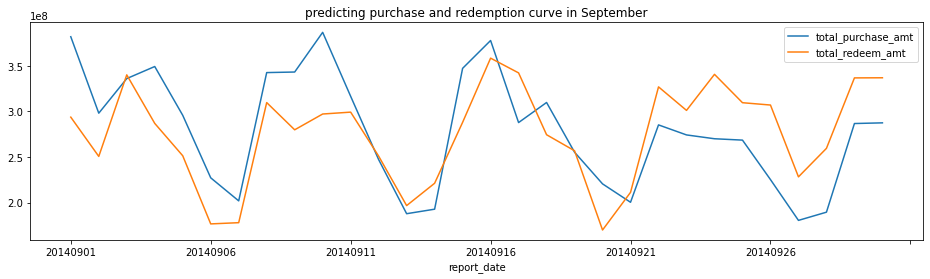

In [43]:
day_pred.set_index('report_date').plot(
    figsize=(16, 4),
    title="predicting purchase and redemption curve in September")

In [44]:
print(calendar.month(2014, 9))

   September 2014
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30



周末的时候购买和赎回都处于低谷，且预测值抖动较大，符合1.3.2中可视化的特征。

# 10 fbprophet、ARIMA、周期因子模型融合预测

## 10.1 读取单模型预测结果

In [45]:
cols = ['report_date', 'total_purchase_amt', 'total_redeem_amt']


pred_factor = pd.read_csv("tc_comp_predict_table_factor_130_6812.csv", header=None, names=cols)
pred_fb = pd.read_csv("tc_comp_predict_table_fb_115_6103.csv", header=None, names=cols)
pred_arima = pd.read_csv("tc_comp_predict_table_ARIMA_ 100_3210.csv", header=None, names=cols)

In [46]:
pred_arima.corrwith(pred_factor)

report_date           1.000000
total_purchase_amt    0.804489
total_redeem_amt      0.812129
dtype: float64

In [47]:
pred_fb.corrwith(pred_factor)

report_date           1.000000
total_purchase_amt    0.770481
total_redeem_amt      0.809215
dtype: float64

In [48]:
pred_fb.corrwith(pred_arima)

report_date           1.000000
total_purchase_amt    0.829355
total_redeem_amt      0.835259
dtype: float64

## 10.2 根据单模型成绩估计融合权重

In [49]:
pred_integration = pred_factor.copy()
pred_integration.iloc[:, 1:] = 0.

In [50]:
"""# 成绩126.9092
purchase_weights = [0.6, 0.28, 0.12]
redeem_weights = [0.5, 0.4, 0.1]
"""

"""# 成绩：131.3555
purchase_weights = [0.7, 0.2, 0.1]
redeem_weights = [0.7, 0.2, 0.1]"""

"""# 成绩：131.3537
purchase_weights = [0.8, 0.1, 0.1]
redeem_weights = [0.6, 0.3, 0.1]"""

# 成绩：132.9677
purchase_weights = [0.8, 0.1, 0.1]
redeem_weights = [0.7, 0.2, 0.1]

for c in cols[1:]:
    if c == 'total_purchase_amt':
        weights = purchase_weights
    else:
        weights = redeem_weights
    pred_integration[c] = weights[0] * pred_factor[c] + weights[1] * pred_fb[c] + weights[2] * pred_arima[c]
    

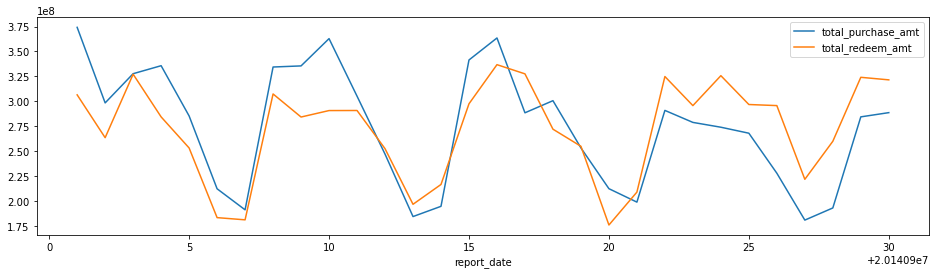

In [51]:
pred_integration.set_index('report_date').plot(figsize=(16, 4))

In [52]:
pred_integration.to_csv("pred_integration.csv", header=None, index=False)

- 当我使用Prophet进行预测时，发现：purchase和130.6812的预测值的相关性不变时，redeem和130.6812的预测值相关性从0.811289降到0.809215，而成绩反而提高了，因此判断Prophet预测的redeem误差变小了，因此融合时，给它的权重和purchase不同。
- 遗憾的是，ARIMA模型的分数调参后并没有得到太大提高。